<a href="https://colab.research.google.com/github/Manmeetkaur17/Manmeetkaur17-HexSoftwares_SLR-on-HousePrices-/blob/main/housePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Loading the dataset

In [ ]:
df=pd.read_csv('Housing.csv')

Understanding the dataset

In [ ]:
df.shape

(545, 13)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


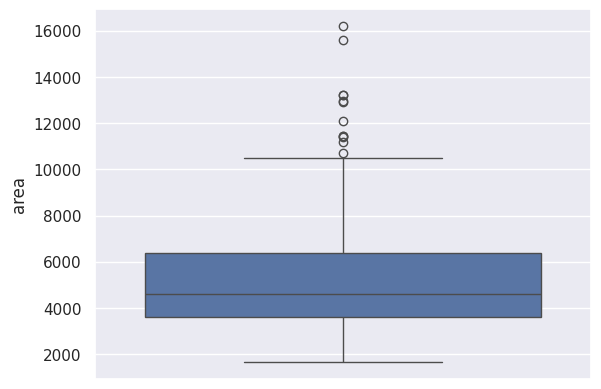

In [ ]:
#create boxplot
sns.set_theme(style='darkgrid')
sns.boxplot(df,y='area')
plt.show()

In [ ]:
Q1=np.percentile(df['area'],25,interpolation='midpoint')
Q2=np.percentile(df['area'],50,interpolation='midpoint')
Q3=np.percentile(df['area'],75,interpolation='midpoint')
IQR=Q3-Q1
print(IQR)

2760.0


In [ ]:
lowerbound=Q1-1.5*IQR
upperbound=Q3+1.5*IQR
print(lowerbound,upperbound)

-540.0 10500.0


In [ ]:
df= df[(df.area>=lowerbound) & (df.area<=upperbound)]

In [ ]:
df.shape

(533, 13)

In [ ]:
#convert string categorical values to numeric value


In [ ]:
#list of columns containing categorical value as string are
cat_cols=df.select_dtypes(include='object').columns.tolist()
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [ ]:
#convert categoricalvalues to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             533 non-null    int64
 1   area              533 non-null    int64
 2   bedrooms          533 non-null    int64
 3   bathrooms         533 non-null    int64
 4   stories           533 non-null    int64
 5   mainroad          533 non-null    int64
 6   guestroom         533 non-null    int64
 7   basement          533 non-null    int64
 8   hotwaterheating   533 non-null    int64
 9   airconditioning   533 non-null    int64
 10  parking           533 non-null    int64
 11  prefarea          533 non-null    int64
 12  furnishingstatus  533 non-null    int64
dtypes: int64(13)
memory usage: 58.3 KB


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


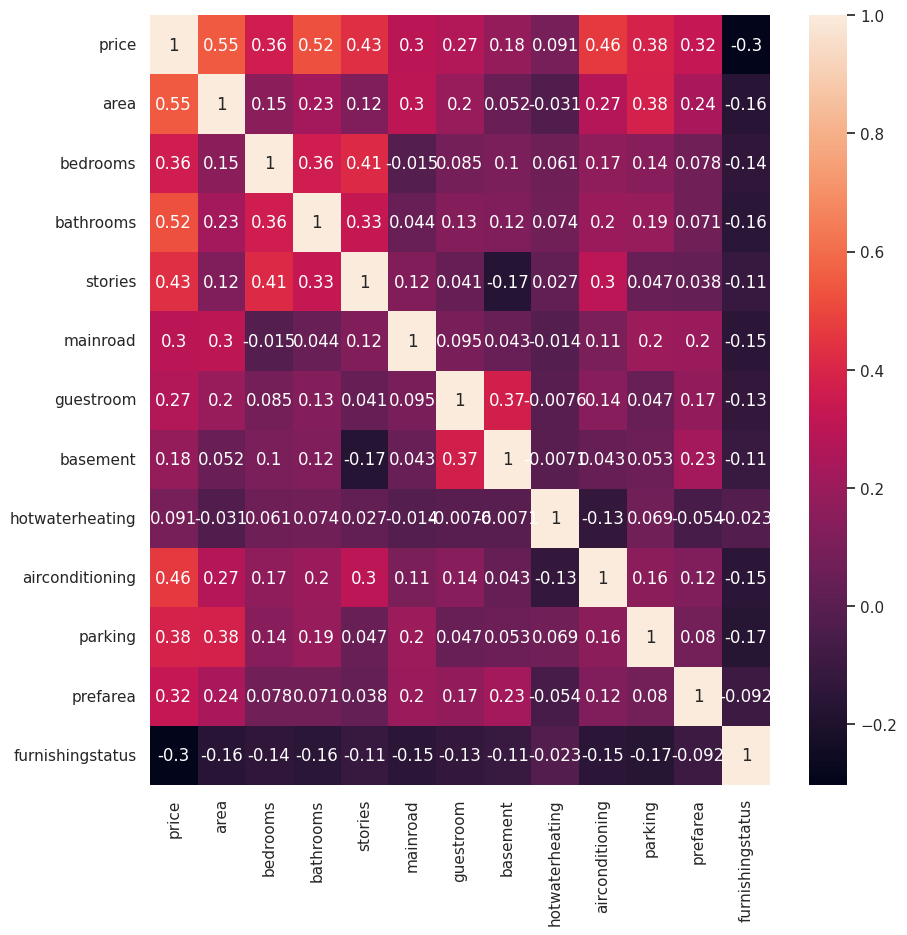

In [ ]:
#use heatmap to find corelation between the variables
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [ ]:

X=df.drop('price',axis=1)
y=df['price']

In [ ]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[:]=scaler.fit_transform(X)

In [ ]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.651977,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.825989,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.938983,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.661017,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.651977,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
528,0.152542,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0
529,0.084746,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
530,0.222599,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
531,0.142373,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((426, 12), (107, 12), (426,), (107,))

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_test[:5]

,price
6,0.727273
489,0.078788
104,0.375758
487,0.078788
448,0.115758


In [ ]:
y_pred[:5]

array([0.67401826, 0.03551793, 0.33430069, 0.30616685, 0.21749202])

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test,y_pred)

0.08016946958282287

In [ ]:
from sklearn.linear_model import Lasso,Ridge
laso_model=Lasso(alpha=0.1, max_iter=100, tol=0.1)
laso_model.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=100, tol=0.1)

In [ ]:
laso_pred=laso_model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,laso_pred)

0.14570064765065427

In [ ]:
ridge_model=Ridge(alpha=0.1, max_iter=100, tol=0.1)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.1, max_iter=100, tol=0.1)

In [ ]:
ridge_pred=ridge_model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,ridge_pred)


0.08011426429188973